In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

In [2]:
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')
    print("NLTK stopwords downloaded.")

In [3]:
df = pd.read_csv('job_descriptions.csv')
print(df.head())
print(df.info())
print(df.describe())

                                     job_description    job_category
0  Proficient in Java, J2EE, Hibernate, and RESTf...  Java Developer
1  Hands-on experience with Java, Maven, and Git ...  Java Developer
2  Hands-on experience with Java, Maven, and Git ...  Java Developer
3  Proficient in Java, J2EE, Hibernate, and RESTf...  Java Developer
4  Seeking a skilled Java engineer for enterprise...  Java Developer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_description  3985 non-null   object
 1   job_category     3985 non-null   object
dtypes: object(2)
memory usage: 62.4+ KB
None
                                          job_description    job_category
count                                                3985            3985
unique                                                128              32
top     Cross-platform mobile de

In [4]:
# --- 2. Preprocessing Teks ---
def preprocess_text(text):
    text = text.lower() # Ubah ke huruf kecil
    text = re.sub(r'[^a-z\s]', '', text) # Hapus karakter non-alfabet
    words = text.split() # Tokenisasi
    stop_words = set(stopwords.words('english')) # Hapus stopwords
    words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer() # Stemming
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

df['preprocessed_description'] = df['job_description'].apply(preprocess_text)
print("Data setelah preprocessing:")
print(df[['job_description', 'preprocessed_description']].head())

Data setelah preprocessing:
                                     job_description  \
0  Proficient in Java, J2EE, Hibernate, and RESTf...   
1  Hands-on experience with Java, Maven, and Git ...   
2  Hands-on experience with Java, Maven, and Git ...   
3  Proficient in Java, J2EE, Hibernate, and RESTf...   
4  Seeking a skilled Java engineer for enterprise...   

                         preprocessed_description  
0                profici java jee hibern rest api  
1      handson experi java maven git agil environ  
2      handson experi java maven git agil environ  
3                profici java jee hibern rest api  
4  seek skill java engin enterpris applic develop  


In [5]:
# --- 3. Split Data Pelatihan dan Pengujian ---
X = df['preprocessed_description']
y = df['job_category']

# Gunakan stratify=y untuk memastikan distribusi kelas yang sama di train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran data pelatihan: {len(X_train)} sampel")
print(f"Ukuran data pengujian: {len(X_test)} sampel")

Ukuran data pelatihan: 3188 sampel
Ukuran data pengujian: 797 sampel


In [6]:
# --- 4. Vektorisasi TF-IDF ---
vectorizer = TfidfVectorizer(ngram_range=(1,2)) # Menggunakan bi-gram untuk menangkap frasa
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Dimensi fitur setelah TF-IDF (pelatihan): {X_train_tfidf.shape}")
print(f"Dimensi fitur setelah TF-IDF (pengujian): {X_test_tfidf.shape}")

Dimensi fitur setelah TF-IDF (pelatihan): (3188, 953)
Dimensi fitur setelah TF-IDF (pengujian): (797, 953)


In [7]:
# --- 5. Pelatihan Model Multinomial Naive Bayes ---
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
print("Model Naive Bayes berhasil dilatih.")

Model Naive Bayes berhasil dilatih.


Akurasi Model pada data pengujian: 1.0000

Classification Report (performa detail per kelas):
                           precision    recall  f1-score   support

              AI Engineer       1.00      1.00      1.00        29
        Backend Developer       1.00      1.00      1.00        20
     Blockchain Developer       1.00      1.00      1.00        23
         Business Analyst       1.00      1.00      1.00        20
          Cloud Architect       1.00      1.00      1.00        31
           Cloud Engineer       1.00      1.00      1.00        33
    Cybersecurity Analyst       1.00      1.00      1.00        27
             Data Analyst       1.00      1.00      1.00        29
           Data Scientist       1.00      1.00      1.00        24
   Database Administrator       1.00      1.00      1.00        23
          DevOps Engineer       1.00      1.00      1.00        29
       DevSecOps Engineer       1.00      1.00      1.00        24
Embedded Systems Engineer       1.

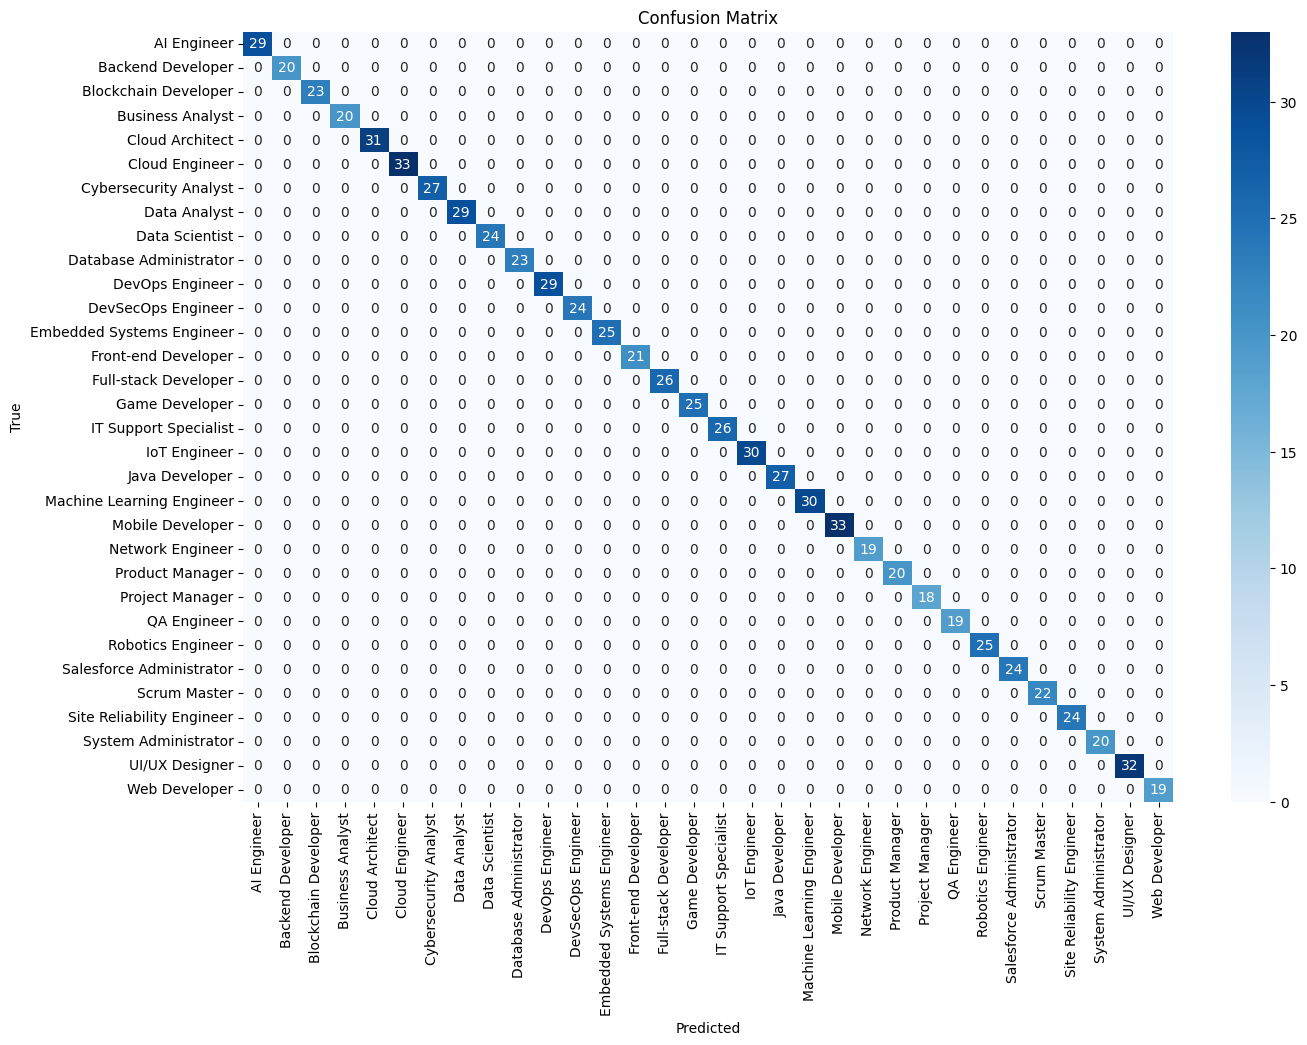

In [8]:
# --- 6. Evaluasi Model ---
y_pred = model.predict(X_test_tfidf)

print(f"Akurasi Model pada data pengujian: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report (performa detail per kelas):")
print(classification_report(y_test, y_pred, zero_division=1))

# Visualisasi Confusion Matrix (untuk melihat kesalahan spesifik)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# --- 7. Prediksi model hasil klasifikasi dengan data baru ---
test_job_descriptions = [
    'Saya seorang insinyur machine learning dengan pengalaman di PyTorch dan pengolahan bahasa alami.',
    'Mencari front-end developer yang menguasai React dan Redux untuk membangun UI yang dinamis.',
    'Ahli keamanan siber yang fokus pada analisis kerentanan dan respons insiden.',
    'Seorang Java developer berpengalaman dengan Spring Boot dan arsitektur microservices.',
    'Mencari data scientist dengan keahlian di statistik, Python, dan visualisasi data.',
    'Saya ahli dalam manajemen proyek perangkat lunak menggunakan metodologi Scrum dan Agile.',
    'Berpengalaman sebagai sistem administrator yang mengelola server Linux dan AWS cloud.',
    'Mencari seorang desainer UI/UX yang kuat dalam Figma dan user experience research.',
    'Pengembang backend dengan Python, Django, dan pengalaman membangun RESTful API.',
    'Pengembang blockchain dengan pengalaman di Solidity dan dApps Ethereum.'
]

for desc in test_job_descriptions:
    # Preprocessing deskripsi baru
    preprocessed_desc = preprocess_text(desc)
    # Vektorisasi deskripsi baru menggunakan vectorizer yang SUDAH DILATIH
    transformed_desc = vectorizer.transform([preprocessed_desc])
    # Prediksi
    prediction = model.predict(transformed_desc)[0]
    print("Hasil Prediksi Model Klasifikasi: \n")
    print(f"Input: '{desc}'")
    print(f"   -> Prediksi Kategori (Job Title): '{prediction}'\n")

Hasil Prediksi Model Klasifikasi: 

Input: 'Saya seorang insinyur machine learning dengan pengalaman di PyTorch dan pengolahan bahasa alami.'
   -> Prediksi Kategori (Job Title): 'Machine Learning Engineer'

Hasil Prediksi Model Klasifikasi: 

Input: 'Mencari front-end developer yang menguasai React dan Redux untuk membangun UI yang dinamis.'
   -> Prediksi Kategori (Job Title): 'Full-stack Developer'

Hasil Prediksi Model Klasifikasi: 

Input: 'Ahli keamanan siber yang fokus pada analisis kerentanan dan respons insiden.'
   -> Prediksi Kategori (Job Title): 'Cloud Engineer'

Hasil Prediksi Model Klasifikasi: 

Input: 'Seorang Java developer berpengalaman dengan Spring Boot dan arsitektur microservices.'
   -> Prediksi Kategori (Job Title): 'Java Developer'

Hasil Prediksi Model Klasifikasi: 

Input: 'Mencari data scientist dengan keahlian di statistik, Python, dan visualisasi data.'
   -> Prediksi Kategori (Job Title): 'Machine Learning Engineer'

Hasil Prediksi Model Klasifikasi: 

I

In [10]:
# --- 8. Menyimpan Model dan Vectorizer ---

# Menyimpan model
model_filename = 'job_desc_model.pkl'
joblib.dump(model, model_filename)
print(f"Model Naive Bayes disimpan sebagai '{model_filename}'")

# Menyimpan vectorizer TF-IDF
vectorizer_filename = 'vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)
print(f"Vectorizer TF-IDF disimpan sebagai '{vectorizer_filename}'")

# Karena kita menggunakan label string langsung dengan MultinomialNB,
# maka tidak perlu menyimpan atau memuat LabelEncoder untuk prediksi ini.
# Jika menggunakan model lain yang memerlukan label numerik (misalnya
# beberapa model dari sklearn yang tidak mendukung label string), maka
# perlu mengencode y sebelum pelatihan dan kemudian menyimpan/memuat encoder-nya.
# Dalam kasus ini, model MultinomialNB langsung memprediksi string.

print("\nModel dan Vectorizer berhasil disimpan.")

Model Naive Bayes disimpan sebagai 'job_desc_model.pkl'
Vectorizer TF-IDF disimpan sebagai 'vectorizer.pkl'

Model dan Vectorizer berhasil disimpan.


In [11]:
# --- Test and Load ---
loaded_model = joblib.load(model_filename)
print(f"Model berhasil dimuat dari '{model_filename}'")
loaded_vectorizer = joblib.load(vectorizer_filename)
print(f"Vectorizer berhasil dimuat dari '{vectorizer_filename}'")

# --- Contoh Prediksi Menggunakan Model yang Dimuat ---
test_desc_loaded = 'Saya ahli dalam analisis data menggunakan Python dan membuat visualisasi dengan Tableau.'
preprocessed_desc_loaded = preprocess_text(test_desc_loaded)
transformed_desc_loaded = loaded_vectorizer.transform([preprocessed_desc_loaded])
predicted_category_loaded = loaded_model.predict(transformed_desc_loaded)[0]

print("--- Contoh Prediksi Menggunakan Model yang Dimuat ---")
print(f"\nInput (dimuat): '{test_desc_loaded}'")
print(f"   -> Prediksi Kategori (dimuat): '{predicted_category_loaded}'\n")

Model berhasil dimuat dari 'job_desc_model.pkl'
Vectorizer berhasil dimuat dari 'vectorizer.pkl'
--- Contoh Prediksi Menggunakan Model yang Dimuat ---

Input (dimuat): 'Saya ahli dalam analisis data menggunakan Python dan membuat visualisasi dengan Tableau.'
   -> Prediksi Kategori (dimuat): 'Machine Learning Engineer'

